In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_cells = 1000

# check network

In [3]:
def read_ntk(tag):
    # row: post, col: pre
    mat = np.zeros([num_cells, num_cells])
    weight_mat = np.zeros([num_cells, num_cells])
    
    fadj = open(tag+"adjlist.txt", "r")
    fstr = open(tag+"strength.txt", "r")
    
    ladj = fadj.readline()
    lstr = fstr.readline()
    while ladj:
        pre, posts = split_vals(ladj)
        posts = [int(i) for i in posts.split(",")[:-1]]
        _, strength = split_vals(lstr)
        strength = [float(i) for i in strength.split(",")[:-1]]
        
        for i, node in enumerate(posts):
            mat[node, pre] = 1
            weight_mat[node, pre] = strength[i]
        
        ladj = fadj.readline()
        lstr = fstr.readline()
        
    return mat, weight_mat

            
def split_vals(line):
    tmp = line.split(":")
    pre_node = int(tmp[0])
    vals = tmp[1]
    return pre_node, vals


def show_mat(mat, weight_mat):
    tick = np.arange(0, num_cells+1, num_cells/4)
    fig = plt.figure(dpi=100, figsize=(7, 3))
    
    plt.subplot(121)
    plt.imshow(mat, cmap='gray', vmax=1, vmin=-1)
    plt.xticks(tick); plt.yticks(tick)
    plt.title("adjacency matrix", fontsize=14)
    
    ax = plt.subplot(122)
    im = plt.imshow(weight_mat, cmap='jet')
    plt.xticks(tick); plt.yticks(tick)
    plt.title("weight matrix", fontsize=14)
    
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)
    
    plt.show()
    


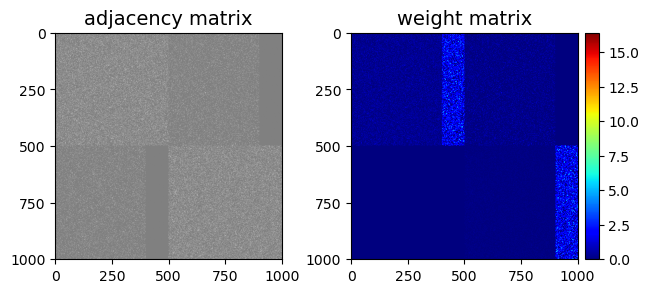

In [4]:
mat, weight_mat = read_ntk("./data/ntk_")
show_mat(mat, weight_mat)

# Read Data

In [5]:
import sys
sys.path.append('../izh_neuralnet/include/')

import nnpy.izh_tools as it
import nnpy.visu_tools as visu
import nnpy.pyeeg as pyeeg

In [6]:
def read_result(fname):
    ts = []
    vs =[[], []]
    with open(fname, "r") as fid:
        line = fid.readline()
        while line:
            vals = [float(x) for x in line.split(",")[:-1]]
            ts.append(vals[0])
            vs[0].append(vals[1])
            vs[1].append(vals[2])
            line = fid.readline()
    return np.array(vs), np.array(ts)

## read env file

In [7]:
tag = './data/result'
with open(tag+"_env.txt", "r") as f:
    # read time
    tmp = f.readline().split("-")
    tmax = float(tmp[0])
    dt = float(tmp[1][:-1])
    # read cell types
    cell_types = [int(x) for x in f.readline().split(",")[:-1]]
ts = np.arange(0, tmax, dt) + dt

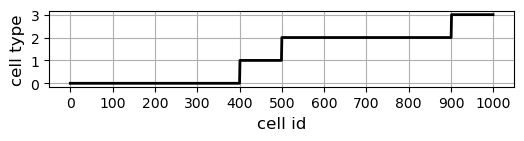

In [8]:
plt.figure(dpi=100, figsize=(6,1))
plt.plot(cell_types, 'k', lw=2)
plt.xlabel("cell id", fontsize=12)
plt.ylabel("cell type", fontsize=12)
plt.xticks(range(0, 1005, 100))
plt.yticks([0, 1, 2, 3])
plt.grid(True)
plt.show()

## read test out files

In [9]:
def read_byte_data(fname, N):
    with open(fname, "rb") as fid:
        data = np.fromfile(fid, dtype=np.dtype(np.double))
    nline = len(data) // N
    return data.reshape([nline, N], order='C').T

In [10]:
# 3 | 2 | 3 | 2
v_monitor = read_byte_data("./data/v_out.dat", 4)
i_monitor = read_byte_data("./data/i_out.dat", 4)
color_codes = ['#d10000', '#ea6b07', '#ffab36', '#2304d1', '#4ae4ff']

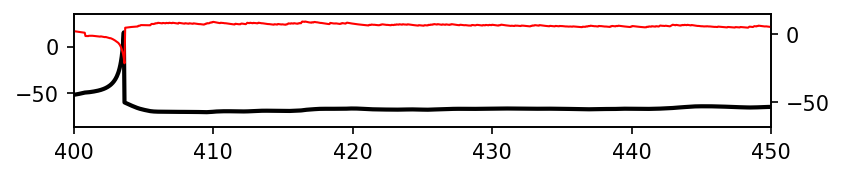

In [11]:
nid = 2
xl = [400, 450]

plt.figure(dpi=150, figsize=(6, 1))
plt.plot(ts, v_monitor[nid], c='k', lw=2)
plt.gca().twinx()
plt.plot(ts, i_monitor[nid], c='r', lw=1)
plt.xlim([400, 450])
plt.show()

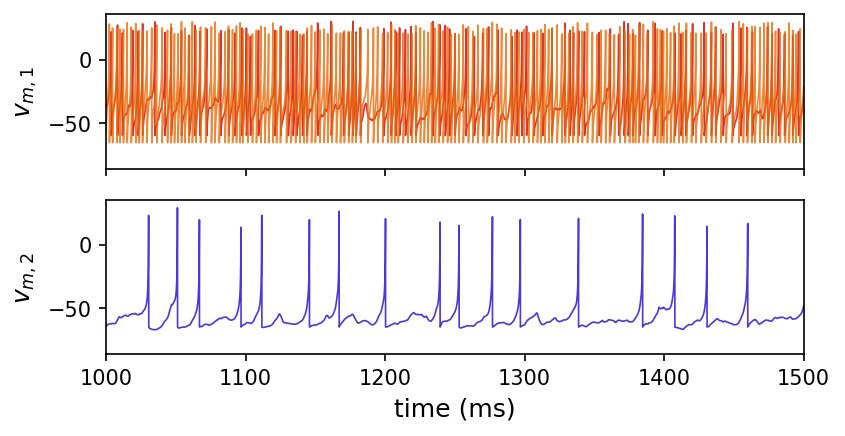

In [12]:
xl = [1000, 1500]
xt = np.arange(xl[0], xl[1]+1, 100)

plt.figure(dpi=150, figsize=(6, 3))
plt.subplot(211)
for i in range(2):
    plt.plot(ts, v_monitor[i], color_codes[i], lw=0.8, alpha=0.8)
plt.xticks(xt, [])
plt.xlim(xl)
plt.ylabel("$v_{m, 1}$", fontsize=12)

plt.subplot(212)
for i in range(3,4):
    plt.plot(ts, v_monitor[i], color_codes[i-5], lw=0.8, alpha=0.8)
plt.xticks(xt)
plt.xlim(xl)

plt.xlabel("time (ms)", fontsize=12)
plt.ylabel("$v_{m, 2}$", fontsize=12)

plt.show()

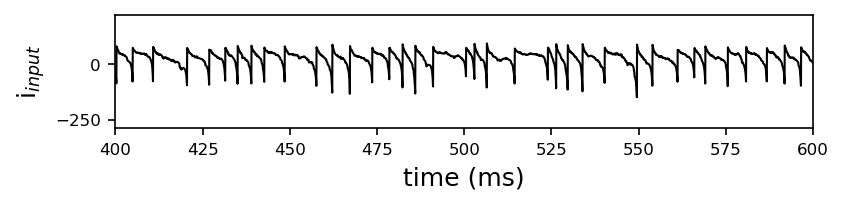

In [13]:
plt.figure(dpi=150, figsize=(6, 1))
plt.plot(ts, i_monitor[0], c='k', lw=1)
plt.xlim([400, 600])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("time (ms)", fontsize=12)
plt.ylabel("i$_{input}$", fontsize=12)
# plt.ylim([-5, 8])
plt.show()

In [14]:
vals = read_byte_data("./data/original_monitor.dat", 10)
i_org = vals[:4]
r_org = vals[4:8]
v_org = vals[8:]
ts_org = np.arange(len(i_org[0]))*dt

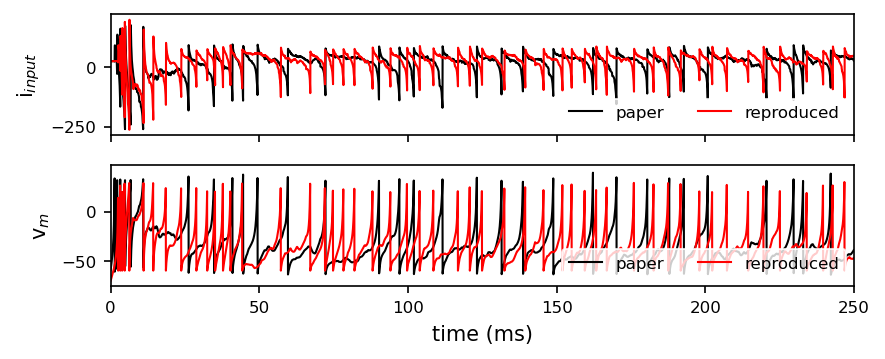

In [15]:
ctp = 0
ids = [0, 3, 5, 8]
xl = [0, 250]

def default_set():
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.figure(dpi=150, figsize=(6, 2.5))

plt.subplot(211)
plt.plot(ts_org, i_org[ctp], c='k', lw=1, label="paper")
plt.plot(ts, i_monitor[ctp], c='r', lw=1, label="reproduced")
plt.legend(fontsize=8, edgecolor="w", ncol=2, loc="lower right")
plt.xlim(xl)
xt = plt.gca().get_xticks()
default_set()
plt.xticks(xt, labels=[])
plt.ylabel("i$_{input}$", fontsize=10)

plt.subplot(212)
plt.plot(ts_org, v_org[ctp], lw=1, c='k', label="paper")
plt.plot(ts, v_monitor[ctp], lw=1, c='r', label="reproduced")
plt.legend(fontsize=8, edgecolor="w", ncol=2, loc="lower right")
plt.xlim(xl)
default_set()
plt.xlabel("time (ms)", fontsize=10)
plt.ylabel("v$_{m}$", fontsize=10)

plt.tight_layout()
plt.show()

## spike

In [16]:
t_spks = [[] for _ in range(num_cells)]
with open("./data/result_spk.txt") as fid:
    line = fid.readline()
    n = 0
    while line:
        ids = [int(i) for i in line.split(",")[:-1]]
        for i in ids:
            t_spks[i].append(n*dt)
        
        line = fid.readline()
        n += 1

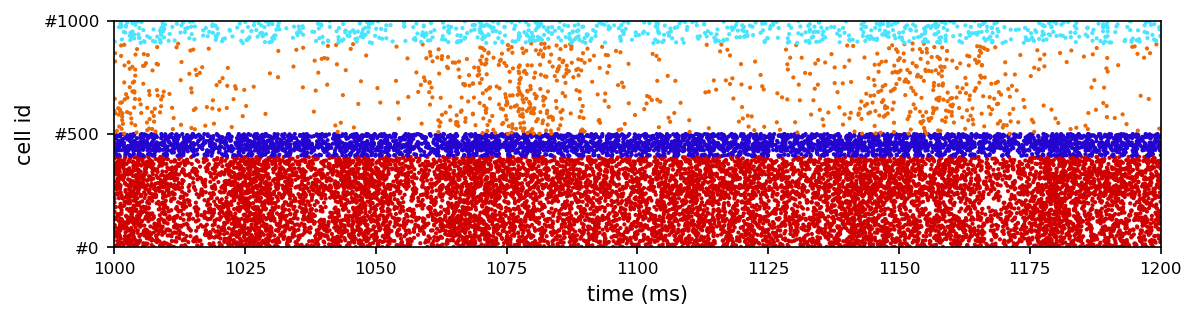

In [17]:
c_rgb = np.array([[209, 0, 0], [35, 4, 209], [234, 107, 7], [74, 228, 255]])/255

plt.figure(dpi=150, figsize=(9, 2))
visu.draw_raster_plot(t_spks, cell_types=cell_types, colors=c_rgb, s=1)
plt.xlim([1000, 1200])
plt.xlabel("time (ms)", fontsize=10)
plt.ylabel("cell id", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## RESULT

In [18]:
from scipy.signal import savgol_filter

vs, ts = read_result("./data/result_v.txt")

# # preprocessing
fs_new = 200
vs_filt = [[], []]
for i in range(2):
    vs_filt[i], ts_filt = pyeeg.downsample_signal(vs[i], ts, 1000/dt, fs_new)

yf = [[], []]
for i in range(2):
    freq, tmp_yf = pyeeg.get_fft_with_t(vs_filt[i], ts_filt, dt=1/fs_new, t_range=[3000, 4000])
    # freq, tmp_yf = pyeeg.get_fft_with_t(vs[i], ts, dt/1000, [4000, 5000])
    idf = (1 <= freq) & (freq <= 200)
    yf[i] = tmp_yf[idf]
freq = freq[idf]

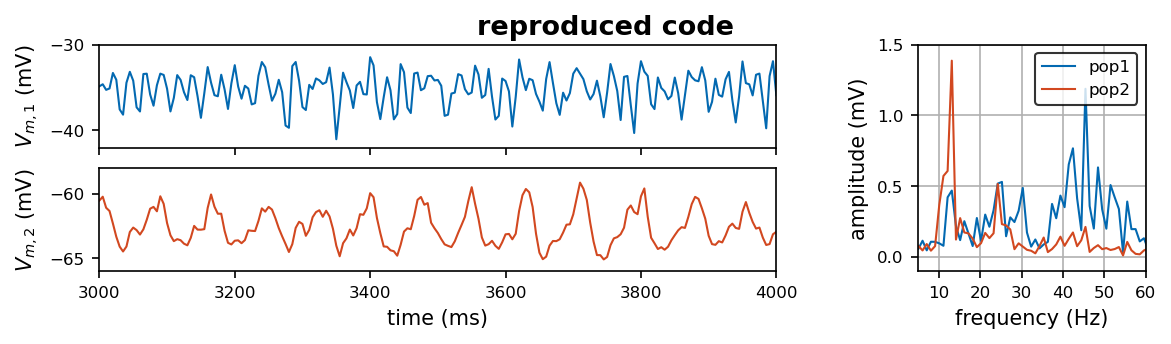

In [19]:
# xl = [6000, 6500]
xl = [3000, 4000]
# idt = (ts >= xl[0]) & (ts <= xl[1])
idt = (ts_filt >= xl[0]) & (ts_filt <= xl[1])
xt = np.arange(xl[0], xl[1]+1, 200)
# cs = ['r', 'b']
cs = np.array([[3, 105, 177], [210, 72, 32]])/255

plt.figure(dpi=150, figsize=(9, 2))

for i in range(2):
    plt.subplot2grid(shape=(2,3), loc=(i,0), colspan=2)
    # plt.plot(ts[idt], vs[i][idt], c=cs[i], lw=1)
    plt.plot(ts_filt[idt], vs_filt[i][idt], c=cs[i], lw=1)
    plt.xlim(xl)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    if i == 0:
        plt.xticks(xt, [])
        plt.ylim([-42, -30])
    else:
        plt.xticks(xt)
        plt.xlabel("time (ms)", fontsize=10)
        plt.ylim([-66, -58])
    plt.ylabel("$V_{m,%d}$ (mV)"%(i+1), fontsize=10)


plt.subplot2grid(shape=(2,4), loc=(0,3), rowspan=2)
for i in range(2):
    # ys = savgol_filter(yf[i], 11, 2, deriv=0, delta=3)
    # plt.plot(freq, ys, c=cs[i], lw=1, label='pop%d'%(i+1))
    plt.plot(freq, yf[i], c=cs[i], lw=1, label='pop%d'%(i+1))
plt.xticks(np.arange(0,100,10))
# plt.yticks(np.arange(0,2.1,0.5))
plt.xlim([5, 60])
plt.ylim([-0.1, 1.5])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.legend(fontsize=8, edgecolor='k', ncol=1, loc='upper right')
plt.xlabel("frequency (Hz)", fontsize=10)
plt.ylabel("amplitude (mV)", fontsize=10)

plt.suptitle("reproduced code", fontsize=13, fontweight="bold")

plt.show()

# Original code

In [20]:
ts_org = []
vs_org = [[], []]
dt_org = 0.05

with open("./data/FeedBackFeedForward_MeanMemPot_gES0.800_gIS16.400_gER3.000_gIR16.000_gSR4.000_gRS0.150_seed1000.mp", "r") as fid:
    line = fid.readline()
    while line:
        vals = [float(x.strip()) for x in line.split("\t")]
        ts_org.append(vals[0])
        vs_org[0].append(vals[2])
        vs_org[1].append(vals[1])
        
        line = fid.readline()

ts_org = np.array(ts_org)
vs_org = np.array(vs_org)

yf_org = [[], []]
for i in range(2):
    freq_org, tmp_yf = pyeeg.get_fft_with_t(vs_org[i], ts_org, dt*100/1000, [1000, 3000])
    idf = (1 <= freq_org) & (freq_org <= 200)
    yf_org[i] = tmp_yf[idf]
freq_org = freq_org[idf]

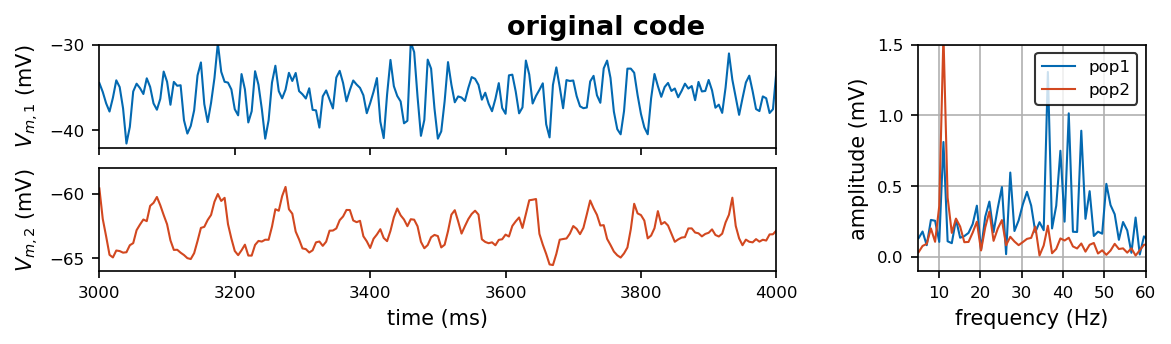

In [21]:
xl = [3000, 4000]
idt = (ts_org >= xl[0]) & (ts_org <= xl[1])
xt = np.arange(xl[0], xl[1]+1, 200)
cs = np.array([[3, 105, 177], [210, 72, 32]])/255

plt.figure(dpi=150, figsize=(9, 2))

for i in range(2):
    plt.subplot2grid(shape=(2,3), loc=(i,0), colspan=2)
    plt.plot(ts_org[idt], vs_org[i][idt], c=cs[i], lw=1)
    plt.xlim(xl)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    if i == 0:
        plt.xticks(xt, [])
        plt.ylim([-42, -30])
    else:
        plt.xticks(xt)
        plt.xlabel("time (ms)", fontsize=10)
        plt.ylim([-66, -58])
    plt.ylabel("$V_{m,%d}$ (mV)"%(i+1), fontsize=10)


plt.subplot2grid(shape=(2,4), loc=(0,3), rowspan=2)
for i in range(2):
#     plt.plot(freq_org, yf_org[i], cs[i], lw=1, label='pop%d'%(i+1))
    # ys_org = savgol_filter(yf_org[i], 31, 2, deriv=0, delta=3)
    # plt.plot(freq_org, ys_org, cs[i], lw=1, label='pop%d'%(i+1))
    plt.plot(freq_org, yf_org[i], lw=1, label="pop%d"%(i+1), c=cs[i])
plt.xticks(np.arange(0,100,10))
# plt.yticks(np.arange(0,2.1,0.5))
plt.xlim([5, 60])
plt.ylim([-0.1, 1.5])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.legend(fontsize=8, edgecolor='k', loc='upper right')
plt.xlabel("frequency (Hz)", fontsize=10)
plt.ylabel("amplitude (mV)", fontsize=10)

plt.suptitle("original code", fontsize=13, fontweight="bold")

plt.show()

# Ensemble data

In [22]:
from tqdm.notebook import tqdm
import os

In [23]:
fdir = "./data_mpi/"
fnames = [f for f in os.listdir(fdir) if "_v.dat" in f]
vs_en = []
for f in tqdm(fnames):
    with open(fdir + f, "rb") as fid:
        data = np.fromfile(fid, dtype=np.double)
        data = data.reshape(-1, 2).T
    vs_en.append(data)
vs_en = np.array(vs_en)
ts_en = np.arange(vs_en.shape[2])*dt
print(vs_en.shape)

  0%|          | 0/300 [00:00<?, ?it/s]

(300, 2, 200000)


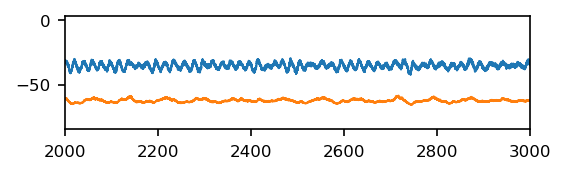

In [24]:
# sample
plt.figure(dpi=150, figsize=(4, 1))
plt.plot(ts_en, vs_en[0][0], lw=1)
plt.plot(ts_en, vs_en[0][1], lw=1)
plt.xlim([2000, 3000])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [66]:
yfs = [0, 0]
vs_filt = [[], []]
fs_new = 500
for n in tqdm(range(vs_en.shape[0])):
    for i in range(2):
        vs_filt_tmp = pyeeg.bandpass_filt(vs_en[n][i], 1000/dt, [1, 200], order=5)
        vs_filt_tmp, ts_filt = pyeeg.downsample_signal(vs_filt_tmp, ts_en, 1000/dt, fs_new)
        freq, tmp_yfs = pyeeg.get_fft_with_t(vs_filt_tmp, ts_filt, 1/fs_new, [2000, 10000])
        vs_filt[i].append(vs_filt_tmp)
        idf = (1 <= freq) & (freq <= 200)
        yfs[i] += tmp_yfs[idf]
yfs = np.array(yfs)
yfs /= vs_en.shape[0]
freq = freq[idf]
vs_filt = np.array(vs_filt)

  0%|          | 0/300 [00:00<?, ?it/s]

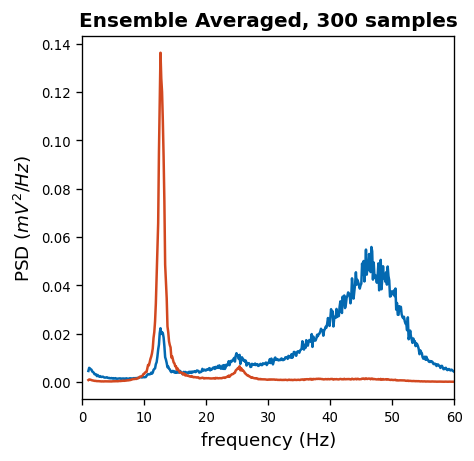

In [67]:
cs = np.array([[3, 105, 177], [210, 72, 32]])/255

plt.figure(dpi=120, figsize=(4,4))
for i in range(2):
    plt.plot(freq, yfs[i]**2, c=cs[i], lw=1.5)
plt.xlabel("frequency (Hz)", fontsize=11)
plt.ylabel("PSD ($mV^{2}/Hz$)", fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim([0, 60])
plt.title("Ensemble Averaged, 300 samples", fontsize=12, fontweight="bold")
plt.show()

## Spectral granger causality

In [121]:
tl = [1000, 9000]
idt = (ts_filt >=tl[0]) & (ts_filt <= tl[1])
data = []
for i in range(vs_filt.shape[0]):
    data.append([])
    for j in range(vs_filt.shape[1]):
        data[-1].append(vs_filt[i][j][idt])
data = np.array(data)
data = np.swapaxes(data, 2, 0)
print(data.shape)

(4001, 300, 2)


In [122]:
result_gc, freq_gc = pyeeg.measure_granger_causality(data, fs_new)
result_gc = result_gc[0]

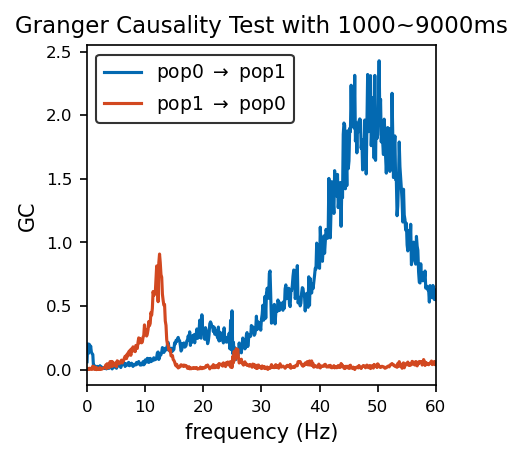

In [136]:
plt.figure(dpi=150, figsize=(3, 3))
for i in range(2):
    plt.plot(freq_gc, result_gc[:,1-i,i], lw=1.5, c=cs[i], label=r"pop%d $\rightarrow$ pop%d"%(i, 1-i))
plt.legend(fontsize=9, edgecolor='k', loc='upper left')
plt.xlabel("frequency (Hz)", fontsize=10)
plt.ylabel("GC", fontsize=10)
plt.title("Granger Causality Test with %d~%dms"%(tl[0], tl[1]), fontsize=11)
plt.xlim([0, 60])
plt.xticks(np.arange(0,70,10), fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## low - high freq nesting

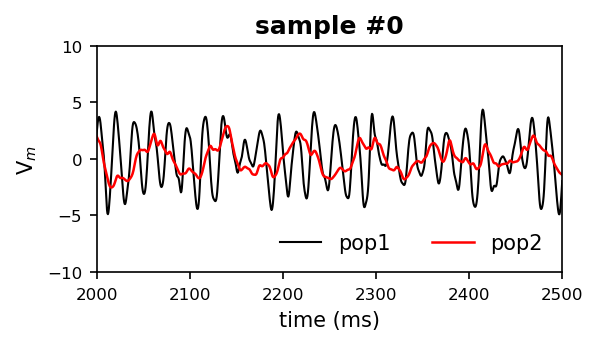

In [312]:
plt.figure(dpi=150, figsize=(4, 2))
plt.plot(ts_filt, vs_filt[0][0], lw=1, c='k', label="pop1")
plt.plot(ts_filt, vs_filt[1][0], lw=1.2, c='r', label="pop2")
plt.ylim([-10, 10])
plt.xlim([2000, 2500])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("time (ms)", fontsize=10)
plt.ylabel("V$_{m}$", fontsize=10)
plt.legend(ncol=2, loc="lower right", edgecolor='w', fontsize=10)
plt.title("sample #0", fontsize=12, fontweight="bold")
plt.show()

In [325]:
xl = [2000, 8000]
idt = (ts_filt >= xl[0]) & (ts_filt<= xl[1])

flows = [[i+5, i+6] for i in range(10)]
fhighs = [[i, i+5] for i in np.arange(20, 56, 2.5)]
mis = 0

for n in tqdm(range(vs_filt.shape[1])):
    obj_pac = pyeeg.PAC(vs_filt[0][n], vs_filt[1][n], fs_new)
    obj_pac.run(flows, fhighs, idt=idt)
              
    mis += obj_pac.mi

mis /= len(vs_filt)

  0%|          | 0/300 [00:00<?, ?it/s]

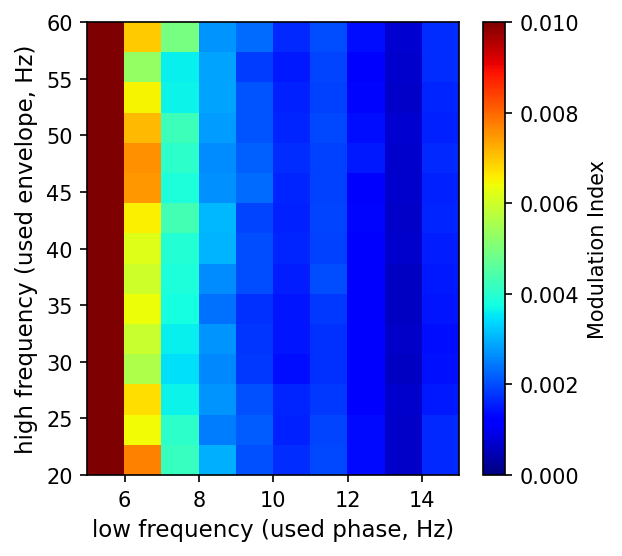

In [342]:
plt.figure(dpi=150, figsize=(4, 4))
plt.imshow(mis, cmap='jet', extent=(flows[0][0], flows[-1][1], fhighs[0][0], fhighs[-1][1]), aspect='auto', vmax=0.01, vmin=0)
plt.xlabel("low frequency (used phase, Hz)", fontsize=11)
plt.ylabel("high frequency (used envelope, Hz)", fontsize=11)
plt.colorbar(label="Modulation Index")
plt.show()